# Exploratory Data Analysis

This notebook is made for exploring the data and analyzing it.

## Imports

Imports that we need to take care of.

In [7]:
import pandas as pd
import numpy as np
import re
from itertools import combinations
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from pandas import CategoricalDtype
from sklearn.model_selection import train_test_split

## Loading the data

Let's load the data into memory.

In [8]:
dfs = {}
datasets = ["data/2018/84468NED_UntypedDataSet_17032023_184722.csv", "data/2017/83901NED_UntypedDataSet_17032023_184829.csv", "data/2016/83903NED_UntypedDataSet_17032023_184919.csv"]


for dataset in datasets:
    findings = re.findall(r"(201\d)", dataset)
    year = findings[0]
    df = pd.read_csv(filepath_or_buffer=dataset, delimiter=";")
    relative_columns = df.columns.to_list()[-5:] #there are five relative columns, skip these for now
    print(relative_columns)
    df = df.drop(columns=relative_columns)
    dfs[year] = df


# Reading in the features for each municipality possibly related to the total crime number.
features_crime = pd.read_csv("data/FeaturesMisdaad.csv", delimiter=";")

# Reading in the municipality province data
df_municipality = pd.read_csv('data/Gemeenten alfabetisch 2018.csv', delimiter=";") #--> 380 rows, but 391 needed......

['TotaalVermogenVernielingEnGeweld_26', 'TotaalVermogensmisdrijven_27', 'TotaalDiefstalUitWoningSchuurED_28', 'VernielingMisdrijfTegenOpenbareOrde_29', 'GeweldsEnSeksueleMisdrijven_30']
['TotaalVermogenVernielingEnGeweld_26', 'TotaalVermogensmisdrijven_27', 'TotaalDiefstalUitWoningSchuurED_28', 'VernielingMisdrijfTegenOpenbareOrde_29', 'GeweldsEnSeksueleMisdrijven_30']
['TotaalVermogenVernielingEnGeweld_26', 'TotaalVermogensmisdrijven_27', 'TotaalDiefstalUitWoningSchuurED_28', 'VernielingMisdrijfTegenOpenbareOrde_29', 'GeweldsEnSeksueleMisdrijven_30']


## Data Cleaning

Let's check if we could join them easily by comparing if they have the same headers.

In [9]:
for comb in combinations(dfs.keys(), r=2):
    year_0 = comb[0]
    year_1 = comb[1]
    if ((dfs[year_0].columns == dfs[year_1].columns).all() == False):
        print('Problem with combination', comb, ", not all columns match.")

Let's inspect if there is a data-related column. If there is, we can just join the table, else we need to make one to seperate the data of 2016, 2017, 2018 by.

In [10]:
dfs["2018"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16771 entries, 0 to 16770
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   ID                                      16771 non-null  int64 
 1   WijkenEnBuurten                         16771 non-null  object
 2   Gemeentenaam_1                          16771 non-null  object
 3   SoortRegio_2                            16771 non-null  object
 4   Codering_3                              16771 non-null  object
 5   Indelingswijziging_4                    16771 non-null  object
 6   AantalInwoners_5                        16771 non-null  int64 
 7   TotaalVermogenVernielingEnGeweld_6      16771 non-null  object
 8   TotaalVermogensmisdrijven_7             16771 non-null  object
 9   TotaalDiefstal_8                        16771 non-null  object
 10  Fietsendiefstal_9                       16771 non-null  object
 11  Di

In [11]:
#Therefore, manually check the 11 missing municipalities
municipality_codes = df_municipality['GemeentecodeGM']
provinces = df_municipality['Provincienaam']

#Auto mapper
mapper = {municipality_codes[i]: provinces[i] for i in range(len(provinces))}
A = set(dfs_gemeente_and_features.reset_index()['index'])
B = set(list(mapper.keys()))
print(A.difference(B))

NameError: name 'df_municipality' is not defined

In [ ]:
np.unique(list(mapper.values()))

array(['Drenthe', 'Flevoland', 'Friesland', 'Gelderland', 'Groningen',
       'Limburg', 'Noord-Brabant', 'Noord-Holland', 'Overijssel',
       'Utrecht', 'Zeeland', 'Zuid-Holland'], dtype='<U13')

In [ ]:
#Additional entries for the mapper
#Some municipalities fused or something, so a manual mapper was needed
#We search for this through https://vocabs.cbs.nl/cbs_ned/nl/page/?uri=https%3A%2F%2Fvocabs.cbs.nl%2Fgeo%2Fdef%2Fgemeenten%2FCodePlaceHolder
#where CodePlaceHolder needs to be replaced by the code of the municipality
mapper['GM0070'] = 'Friesland'
mapper['GM1987'] = 'Groningen'
mapper['GM0081'] = 'Friesland'
mapper['GM0007'] = 'Groningen'
mapper['GM0063'] = 'Friesland'
mapper['GM0018'] = 'Groningen'
mapper['GM0040'] = 'Groningen'
mapper['GM0196'] = 'Gelderland'
mapper['GM0048'] = 'Groningen'
mapper['GM0140'] = 'Friesland'
mapper['GM1908'] = 'Friesland'

In [ ]:
dfs_gemeente_and_features

,Indelingswijziging,AantalInwoners,TotaalVermogenVernielingEnGeweld,TotaalVermogensmisdrijven,TotaalDiefstal,Fietsendiefstal,DiefstalOverigeVervoermiddelen,DiefstalUitVanafVervoermiddelen,ZakkenrollerijStraatroofEnBeroving,TotaalDiefstalUitWoningSchuurED,...,TotaalMetMigratieachtergrond_35,Bevolkingsdichtheid_57,Koopwoningen_94,Huurwoningen_95,EigendomOnbekend_96,TotaalAantalBanen_112,ParticuliereHuishoudensExclStudenten_121,TypePaarZonderKind_135,BronInkomenAlsWerknemer_137,Werkloosheid_155
GM0003,0.0,11924.333333,352.666667,218.000000,171.000000,33.333333,8.666667,11.000000,3.000000,28.333333,...,1661.333333,497.333333,48.733333,51.133333,0.166667,3.766667,5.533333,28.900000,29.033333,196.666667
GM0005,0.0,10462.333333,149.666667,97.666667,62.000000,8.333333,2.666667,4.333333,0.666667,19.666667,...,790.000000,235.000000,68.450000,31.200000,0.400000,3.200000,4.350000,31.150000,30.150000,175.000000
GM0007,0.0,8945.000000,178.500000,108.000000,76.000000,4.500000,3.000000,5.000000,0.000000,21.000000,...,973.000000,82.000000,70.600000,28.400000,1.000000,1.700000,4.000000,29.000000,29.600000,150.000000
GM0009,0.0,7310.666667,106.333333,68.333333,42.666667,9.666667,1.000000,3.000000,0.333333,8.666667,...,515.500000,161.000000,76.600000,23.300000,0.100000,1.150000,2.950000,32.300000,30.900000,105.000000
GM0010,0.0,24965.666667,858.666667,526.000000,427.333333,63.000000,11.333333,43.333333,14.333333,76.000000,...,4439.333333,187.000000,61.600000,37.933333,0.466667,10.566667,11.466667,29.500000,30.066667,413.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GM1949,0.0,46112.000000,830.000000,499.000000,370.000000,64.000000,20.000000,48.000000,2.000000,89.000000,...,3980.500000,161.500000,67.450000,32.100000,0.400000,13.450000,20.000000,30.000000,29.800000,665.000000
GM1950,0.0,24684.000000,915.000000,623.000000,542.000000,32.000000,6.000000,34.000000,9.000000,78.000000,...,2594.000000,90.500000,66.800000,29.700000,3.400000,7.500000,11.100000,29.200000,30.300000,340.000000
GM1952,0.0,60951.000000,1433.000000,836.000000,585.000000,109.000000,36.000000,32.000000,6.000000,132.000000,...,8712.500000,217.500000,61.900000,37.500000,0.600000,19.250000,27.300000,30.150000,30.000000,970.000000
GM1955,0.0,35372.000000,868.000000,604.333333,467.333333,76.333333,26.666667,80.666667,10.666667,122.666667,...,4324.333333,337.333333,65.366667,34.500000,0.133333,16.266667,15.300000,31.166667,31.266667,513.333333


In [ ]:
dfs_gemeente_and_features = dfs_gemeente_and_features.reset_index()
dfs_gemeente_and_features["Province"] = dfs_gemeente_and_features['index'].replace(mapper)

In [ ]:
dfs_gemeente_and_features

,index,Indelingswijziging,AantalInwoners,TotaalVermogenVernielingEnGeweld,TotaalVermogensmisdrijven,TotaalDiefstal,Fietsendiefstal,DiefstalOverigeVervoermiddelen,DiefstalUitVanafVervoermiddelen,ZakkenrollerijStraatroofEnBeroving,...,Bevolkingsdichtheid_57,Koopwoningen_94,Huurwoningen_95,EigendomOnbekend_96,TotaalAantalBanen_112,ParticuliereHuishoudensExclStudenten_121,TypePaarZonderKind_135,BronInkomenAlsWerknemer_137,Werkloosheid_155,Province
0,GM0003,0.0,11924.333333,352.666667,218.000000,171.000000,33.333333,8.666667,11.000000,3.000000,...,497.333333,48.733333,51.133333,0.166667,3.766667,5.533333,28.900000,29.033333,196.666667,Groningen
1,GM0005,0.0,10462.333333,149.666667,97.666667,62.000000,8.333333,2.666667,4.333333,0.666667,...,235.000000,68.450000,31.200000,0.400000,3.200000,4.350000,31.150000,30.150000,175.000000,Groningen
2,GM0007,0.0,8945.000000,178.500000,108.000000,76.000000,4.500000,3.000000,5.000000,0.000000,...,82.000000,70.600000,28.400000,1.000000,1.700000,4.000000,29.000000,29.600000,150.000000,Groningen
3,GM0009,0.0,7310.666667,106.333333,68.333333,42.666667,9.666667,1.000000,3.000000,0.333333,...,161.000000,76.600000,23.300000,0.100000,1.150000,2.950000,32.300000,30.900000,105.000000,Groningen
4,GM0010,0.0,24965.666667,858.666667,526.000000,427.333333,63.000000,11.333333,43.333333,14.333333,...,187.000000,61.600000,37.933333,0.466667,10.566667,11.466667,29.500000,30.066667,413.333333,Groningen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,GM1949,0.0,46112.000000,830.000000,499.000000,370.000000,64.000000,20.000000,48.000000,2.000000,...,161.500000,67.450000,32.100000,0.400000,13.450000,20.000000,30.000000,29.800000,665.000000,Friesland
387,GM1950,0.0,24684.000000,915.000000,623.000000,542.000000,32.000000,6.000000,34.000000,9.000000,...,90.500000,66.800000,29.700000,3.400000,7.500000,11.100000,29.200000,30.300000,340.000000,Groningen
388,GM1952,0.0,60951.000000,1433.000000,836.000000,585.000000,109.000000,36.000000,32.000000,6.000000,...,217.500000,61.900000,37.500000,0.600000,19.250000,27.300000,30.150000,30.000000,970.000000,Groningen
389,GM1955,0.0,35372.000000,868.000000,604.333333,467.333333,76.333333,26.666667,80.666667,10.666667,...,337.333333,65.366667,34.500000,0.133333,16.266667,15.300000,31.166667,31.266667,513.333333,Gelderland


In [ ]:
#check NaN
dfs_gemeente_and_features.isna().sum().sum()

0

In [ ]:
df_all = fix_zeros_Wouter(df_all, low=6, high=25)

C:\Users\Martijn Elands\AppData\Local\Temp\ipykernel_8968\2054924098.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.iloc[:,i] = dataframe.iloc[:,i].astype(int)


In [ ]:
# Creating a total crime category (sum of all crimes). Then dividing each type of crime by the total crime per municipality to find the proportion of each crime contributing to the total.
# Also creating a crime per capita variable for each category.

dfs_gemeente_and_features['total_crime'] = dfs_gemeente_and_features.iloc[:,2:19].sum(axis=1)
dfs_gemeente_and_features['crime_per_capita'] = dfs_gemeente_and_features['total_crime'].div(dfs_gemeente_and_features['AantalInwoners'])
relative_crimes = dfs_gemeente_and_features.iloc[:,2:19].div(dfs_gemeente_and_features.total_crime, axis=0)
relative_crimes

,AantalInwoners,TotaalVermogenVernielingEnGeweld,TotaalVermogensmisdrijven,TotaalDiefstal,Fietsendiefstal,DiefstalOverigeVervoermiddelen,DiefstalUitVanafVervoermiddelen,ZakkenrollerijStraatroofEnBeroving,TotaalDiefstalUitWoningSchuurED,DiefstalUitNietResidentieleGebouwen,OverigeDiefstalInbraak,OverigeVermogensmisdrijven,TotaalVernielingTegenOpenbareOrde,TotaalVernieling,VernielingAanAuto,OverigeVernieling,OverigeVernielingTegenOpenbareOrde
0,0.913695,0.027023,0.016704,0.013103,0.002554,0.000664,0.000843,0.000230,0.002171,0.004291,0.002350,0.003601,0.004572,0.003627,0.001609,0.002018,0.000945
1,0.954360,0.013652,0.008909,0.005656,0.000760,0.000243,0.000395,0.000061,0.001794,0.000639,0.001764,0.003253,0.003010,0.002493,0.000912,0.001581,0.000517
2,0.939403,0.018746,0.011342,0.007982,0.000473,0.000315,0.000525,0.000000,0.002205,0.001733,0.002731,0.003361,0.003938,0.003308,0.000840,0.002468,0.000630
3,0.953565,0.013870,0.008913,0.005565,0.001261,0.000130,0.000391,0.000043,0.001130,0.001826,0.000783,0.003348,0.003174,0.002826,0.000783,0.002043,0.000348
4,0.899437,0.030935,0.018950,0.015396,0.002270,0.000408,0.001561,0.000516,0.002738,0.004840,0.003062,0.003555,0.005836,0.004659,0.001753,0.002906,0.001177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.944163,0.016995,0.010217,0.007576,0.001310,0.000410,0.000983,0.000041,0.001822,0.001147,0.001863,0.002641,0.003829,0.003174,0.001556,0.001618,0.000655
387,0.889610,0.032977,0.022453,0.019534,0.001153,0.000216,0.001225,0.000324,0.002811,0.010271,0.003532,0.002919,0.004793,0.003388,0.001370,0.002018,0.001406
388,0.930180,0.021869,0.012758,0.008928,0.001663,0.000549,0.000488,0.000092,0.002014,0.002106,0.002014,0.003831,0.004838,0.003831,0.001267,0.002564,0.001007
389,0.921202,0.022606,0.015739,0.012171,0.001988,0.000694,0.002101,0.000278,0.003195,0.001493,0.002422,0.003568,0.004306,0.003933,0.001797,0.002136,0.000373


In [ ]:
dfs_province = dfs_gemeente_and_features.groupby('Province').sum()

C:\Users\Martijn Elands\AppData\Local\Temp\ipykernel_8968\1792882260.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfs_province = dfs_gemeente_and_features.groupby('Province').sum()


In [ ]:
#dfs_province = dfs_province.reset_index()
tuples_total_crime = []
tuples_crime_per_capita = []

dfs_province = dfs_province.reset_index()

for i in range(len(dfs_province)):
    tuples_total_crime.append((dfs_province['Province'][i], dfs_province['total_crime'][i]))
    tuples_crime_per_capita.append((dfs_province['Province'][i], dfs_province['crime_per_capita'][i]))

In [ ]:
short_province = {}
short_province['Friesland'] = 'F'
short_province['Drenthe'] = 'D'
short_province['Overijssel'] = 'O'
short_province['Flevoland'] = 'Fle'
short_province['Gelderland'] = 'Gld'
short_province['Utrecht'] = 'U'
short_province['Noord-Holland'] = 'NH'
short_province['Zuid-Holland'] = 'ZH'
short_province['Zeeland'] = 'Z'
short_province['Noord-Brabant'] = 'NB'
short_province['Limburg'] = 'L'
short_province['Zeeland'] = 'Z'
short_province['Groningen'] = 'Gr'

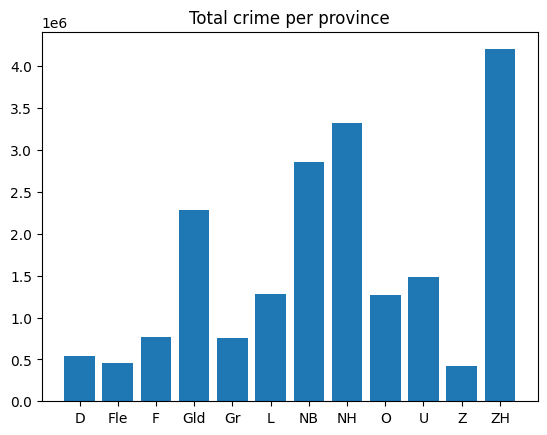

In [ ]:
x = [short_province[tuples_total_crime[i][0]] for i in range(len(tuples_total_crime))]
height = [tuples_total_crime[i][1] for i in range(len(tuples_total_crime))]
plt.bar(x=x, height=height)
plt.title("Total crime per province")
plt.show()

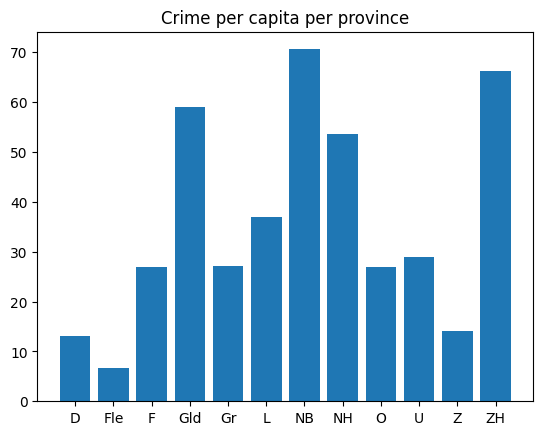

In [ ]:
x = [short_province[tuples_crime_per_capita[i][0]] for i in range(len(tuples_crime_per_capita))]
height = [tuples_crime_per_capita[i][1] for i in range(len(tuples_crime_per_capita))]
plt.bar(x=x, height=height)
plt.title("Crime per capita per province")
plt.show()

                                     AantalInwoners  \
AantalInwoners                             1.000000   
TotaalVermogenVernielingEnGeweld          -0.996732   
TotaalVermogensmisdrijven                 -0.988437   
TotaalDiefstal                            -0.985249   
Fietsendiefstal                           -0.795305   
DiefstalOverigeVervoermiddelen            -0.730504   
DiefstalUitVanafVervoermiddelen           -0.717067   
ZakkenrollerijStraatroofEnBeroving        -0.745472   
TotaalDiefstalUitWoningSchuurED           -0.612326   
DiefstalUitNietResidentieleGebouwen       -0.782971   
OverigeDiefstalInbraak                    -0.781990   
OverigeVermogensmisdrijven                -0.701734   
TotaalVernielingTegenOpenbareOrde         -0.741464   
TotaalVernieling                          -0.682516   
VernielingAanAuto                         -0.690268   
OverigeVernieling                         -0.531982   
OverigeVernielingTegenOpenbareOrde        -0.762430   

         

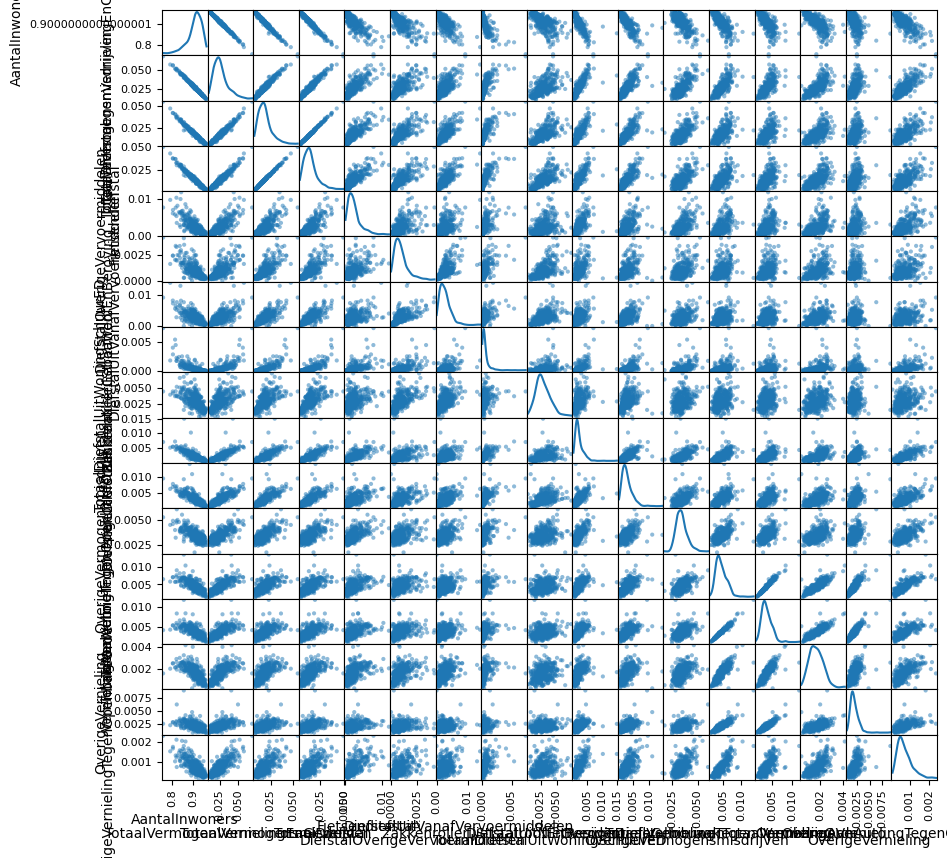

In [ ]:
print(relative_crimes.corr())
pd.plotting.scatter_matrix(relative_crimes, figsize=(10, 10), diagonal='kde')
plt.show()

The plotting of this giant plot is not that sensible since some theft/crime numbers are made up of each other. Therefore, we will later investigate the main principle components (dimensionality reduction) and work with those.

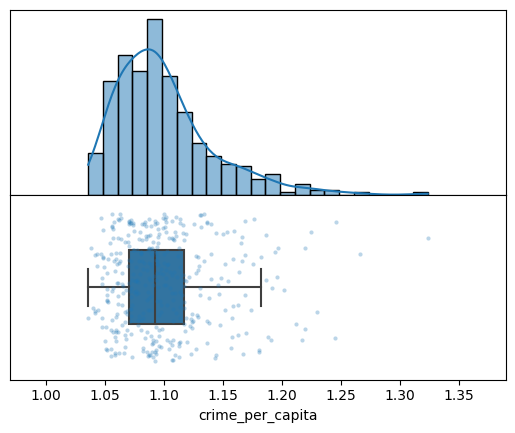

In [ ]:
fig, axs = plt.subplots(nrows=2)

sns.histplot(
    dfs_gemeente_and_features['crime_per_capita'],
    kde=True,
    ax=axs[0]
)

sns.stripplot(
    dfs_gemeente_and_features['crime_per_capita'], 
    orient='h',
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3
)
sns.boxplot(
    dfs_gemeente_and_features['crime_per_capita'],
    orient='h',
    width=0.4, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(dfs_gemeente_and_features['crime_per_capita']) * 0.05
xmin = np.min(dfs_gemeente_and_features['crime_per_capita']) - spacer
xmax = np.max(dfs_gemeente_and_features['crime_per_capita']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].set_facecolor('white')

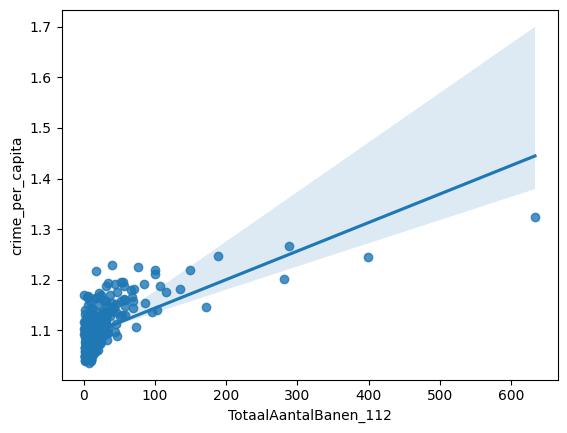

In [ ]:
sns.regplot(x=dfs_gemeente_and_features['TotaalAantalBanen_112'], y=dfs_gemeente_and_features['crime_per_capita'])
plt.show()


C:\Users\Martijn Elands\AppData\Local\Temp\ipykernel_8968\3115759026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noCity['werkloos_per_capita'] = noCity['Werkloosheid_155'].div(noCity['AantalInwoners'])


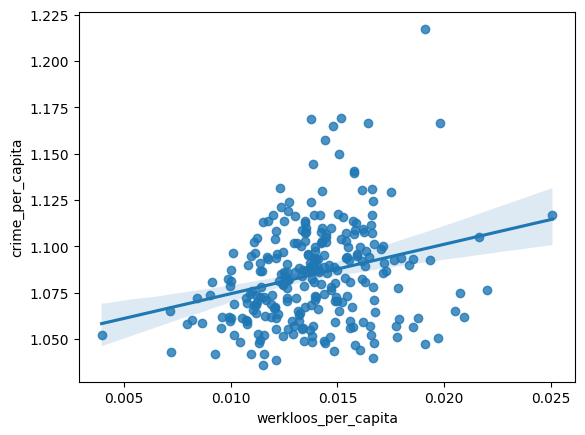

In [ ]:
noCity = dfs_gemeente_and_features.loc[dfs_gemeente_and_features['AantalInwoners']<40000] 
noCity['werkloos_per_capita'] = noCity['Werkloosheid_155'].div(noCity['AantalInwoners'])
sns.regplot(x=noCity['werkloos_per_capita'], y=noCity['crime_per_capita'])

plt.show()

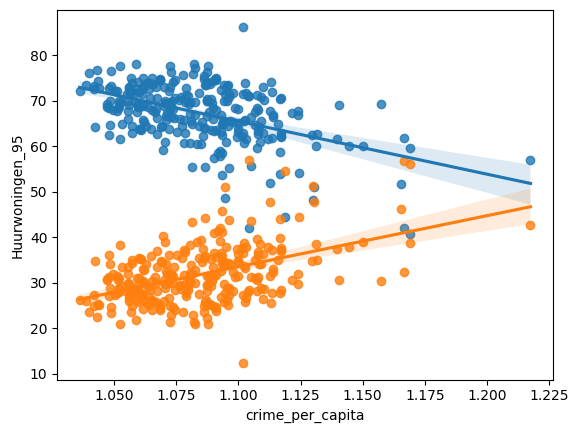

In [ ]:
sns.regplot(x=noCity['crime_per_capita'], y=noCity['Koopwoningen_94'])
sns.regplot(x=noCity['crime_per_capita'], y=noCity['Huurwoningen_95'])

plt.show()

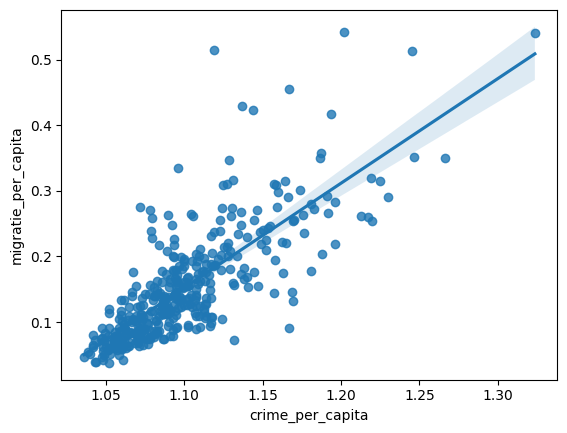

In [ ]:
dfs_gemeente_and_features['migratie_per_capita'] = dfs_gemeente_and_features['TotaalMetMigratieachtergrond_35'].div(dfs_gemeente_and_features['AantalInwoners'])
sns.regplot(x=dfs_gemeente_and_features['crime_per_capita'], y=dfs_gemeente_and_features['migratie_per_capita'])

plt.show()

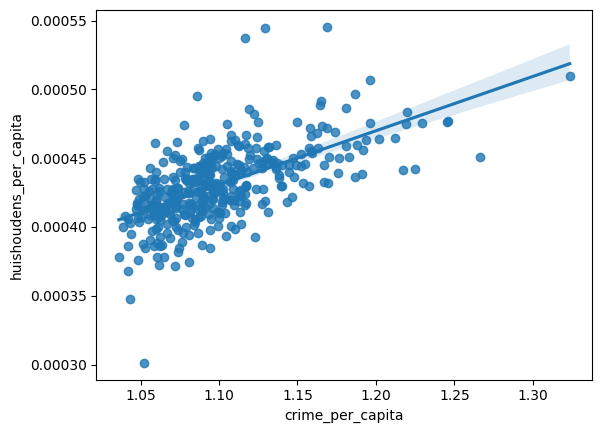

In [ ]:
dfs_gemeente_and_features['huishoudens_per_capita'] = dfs_gemeente_and_features['ParticuliereHuishoudensExclStudenten_121'].div(dfs_gemeente_and_features['AantalInwoners'])

sns.regplot(x=dfs_gemeente_and_features['crime_per_capita'], y=dfs_gemeente_and_features['huishoudens_per_capita'])

plt.show()

In [ ]:
dfs_gemeente_and_features['Mannen_2']


0       5757.666667
1       5238.000000
2       4534.000000
3       3611.500000
4      12481.000000
           ...     
386    23404.500000
387    12486.500000
388    30561.500000
389    17843.333333
390     6181.000000
Name: Mannen_2, Length: 391, dtype: float64

In [ ]:
relative_gemeente_features = dfs_gemeente_and_features.iloc[:,21:]
relative_gemeente_features['Bevolkingsdichtheid_57'] = relative_gemeente_features['Bevolkingsdichtheid_57'].div(dfs_gemeente_and_features.AantalInwoners, axis=0)
relative_gemeente_features['TotaalAantalBanen_112'] = relative_gemeente_features['TotaalAantalBanen_112'].div(dfs_gemeente_and_features.AantalInwoners, axis=0)
relative_gemeente_features['Werkloosheid_155'] = relative_gemeente_features['Werkloosheid_155'].div(dfs_gemeente_and_features.AantalInwoners, axis=0)
relative_gemeente_features['Mannen_2'] = relative_gemeente_features['Mannen_2'].div(dfs_gemeente_and_features.AantalInwoners, axis=0)
relative_gemeente_features['Vrouwen_3'] = relative_gemeente_features['Vrouwen_3'].div(dfs_gemeente_and_features.AantalInwoners, axis=0)

relative_gemeente_features.drop(columns=['TotaalMetMigratieachtergrond_35','ParticuliereHuishoudensExclStudenten_121'], inplace=True)

relative_gemeente_features

,ID,Mannen_2,Vrouwen_3,Bevolkingsdichtheid_57,Koopwoningen_94,Huurwoningen_95,EigendomOnbekend_96,TotaalAantalBanen_112,TypePaarZonderKind_135,BronInkomenAlsWerknemer_137,Werkloosheid_155,Province,total_crime,crime_per_capita,migratie_per_capita,huishoudens_per_capita
0,2515.0,0.482850,0.509323,0.041707,48.733333,51.133333,0.166667,0.000316,28.900000,29.033333,0.016493,Groningen,13050.666667,1.094457,0.139323,0.000464
1,2906.5,0.500653,0.500749,0.022462,68.450000,31.200000,0.400000,0.000306,31.150000,30.150000,0.016727,Groningen,10962.666667,1.047822,0.075509,0.000416
2,3130.0,0.506875,0.490218,0.009167,70.600000,28.400000,1.000000,0.000190,29.000000,29.600000,0.016769,Groningen,9522.000000,1.064505,0.108776,0.000447
3,4054.5,0.494004,0.503169,0.022023,76.600000,23.300000,0.100000,0.000157,32.300000,30.900000,0.014363,Groningen,7666.666667,1.048696,0.070513,0.000404
4,5203.0,0.499927,0.495360,0.007490,61.600000,37.933333,0.466667,0.000423,29.500000,30.066667,0.016556,Groningen,27757.000000,1.111807,0.177818,0.000459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,19679.5,0.507558,0.491531,0.003502,67.450000,32.100000,0.400000,0.000292,30.000000,29.800000,0.014421,Friesland,48839.000000,1.059139,0.086322,0.000434
387,20407.5,0.505854,0.504578,0.003666,66.800000,29.700000,3.400000,0.000304,29.200000,30.300000,0.013774,Groningen,27747.000000,1.124088,0.105088,0.000450
388,12903.5,0.501411,0.498179,0.003568,61.900000,37.500000,0.600000,0.000316,30.150000,30.000000,0.015914,Groningen,65526.000000,1.075060,0.142943,0.000448
389,13211.0,0.504448,0.503590,0.009537,65.366667,34.500000,0.133333,0.000460,31.166667,31.266667,0.014512,Gelderland,38397.666667,1.085538,0.122253,0.000433


In [ ]:
cats = [
    'Friesland',
    'Groningen',
    'Drenthe',
    'Overijsel',
    'Noord-Holland',
    'Zuid-Holland',
    'Brabant',
    'Limburg',
    'Utrecht',
    'Zeeland',
    'Flevoland',
    'Gelderland'
]
cats = list(short_province.keys()) #try enabling this
cat_type = CategoricalDtype(categories=cats)
relative_gemeente_features['Province'] = relative_gemeente_features['Province'].astype(cat_type)
relative_gemeente_features = pd.get_dummies(relative_gemeente_features,
                          prefix='pro',
                          columns=['Province'], 
                          drop_first=True)


In [ ]:
relative_gemeente_features

,ID,Mannen_2,Vrouwen_3,Bevolkingsdichtheid_57,Koopwoningen_94,Huurwoningen_95,EigendomOnbekend_96,TotaalAantalBanen_112,TypePaarZonderKind_135,BronInkomenAlsWerknemer_137,...,pro_Overijssel,pro_Flevoland,pro_Gelderland,pro_Utrecht,pro_Noord-Holland,pro_Zuid-Holland,pro_Zeeland,pro_Noord-Brabant,pro_Limburg,pro_Groningen
0,2515.0,0.482850,0.509323,0.041707,48.733333,51.133333,0.166667,0.000316,28.900000,29.033333,...,0,0,0,0,0,0,0,0,0,1
1,2906.5,0.500653,0.500749,0.022462,68.450000,31.200000,0.400000,0.000306,31.150000,30.150000,...,0,0,0,0,0,0,0,0,0,1
2,3130.0,0.506875,0.490218,0.009167,70.600000,28.400000,1.000000,0.000190,29.000000,29.600000,...,0,0,0,0,0,0,0,0,0,1
3,4054.5,0.494004,0.503169,0.022023,76.600000,23.300000,0.100000,0.000157,32.300000,30.900000,...,0,0,0,0,0,0,0,0,0,1
4,5203.0,0.499927,0.495360,0.007490,61.600000,37.933333,0.466667,0.000423,29.500000,30.066667,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,19679.5,0.507558,0.491531,0.003502,67.450000,32.100000,0.400000,0.000292,30.000000,29.800000,...,0,0,0,0,0,0,0,0,0,0
387,20407.5,0.505854,0.504578,0.003666,66.800000,29.700000,3.400000,0.000304,29.200000,30.300000,...,0,0,0,0,0,0,0,0,0,1
388,12903.5,0.501411,0.498179,0.003568,61.900000,37.500000,0.600000,0.000316,30.150000,30.000000,...,0,0,0,0,0,0,0,0,0,1
389,13211.0,0.504448,0.503590,0.009537,65.366667,34.500000,0.133333,0.000460,31.166667,31.266667,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#c1 = Counter(relative_gemeente_features['Province'])

#x = list(c1.keys())
#x_prime = [short_province[k] for k in x]
#height = list(c1.values())
#plt.bar(x=x_prime, height=height)
#plt.title("Number of data entries for each province")
#plt.show()

## Dimensionality Reduction using PCA/SVD

In [ ]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

def dataframe_PCA(data: pd.DataFrame, columns_to_drop: list, limit_components: int = -1) -> pd.DataFrame:
    """
    Generates PCA dataframe by the data. It also offers some cleaning and it has automatic scaling.

    Args:
        data (pd.DataFrame): data that needs to be cleaned (with column removal) and scaled
        columns_to_drop (list): columns to drop for cleaning
        limit_components (int, optional): limits the amount of components for PCA. Defaults to -1 which is no limit.

    Returns:
        pd.DataFrame: PCA dataframe
    """
    cleaned_data = data.drop(columns=columns_to_drop) # Some cleaning before PCA
    print(cleaned_data.columns)
    X = scale(cleaned_data.values) # Scale dataset

    # Create PCA and transform to new coordinate system
    if (limit_components == -1):
        PCA_model = PCA()
    else:
        PCA_model = PCA(limit_components)
    X_PCA = PCA_model.fit_transform(X)

    # Create new DataFrame to check the
    #print(len(cleaned_data.columns))
    columns = ["PC_" + str(i) for i in range(len(cleaned_data.columns))]
    df_PCA = pd.DataFrame(X_PCA, columns=columns)

    #print(PCA_model.explained_variance_)
    #print()
    #print(PCA_model.explained_variance_ratio_)
    print(PCA_model.singular_values_)
    print(PCA_model.get_feature_names_out())

    return df_PCA

df_PCA = dataframe_PCA(data=relative_gemeente_features, columns_to_drop=['ID'])

Index(['Mannen_2', 'Vrouwen_3', 'Bevolkingsdichtheid_57', 'Koopwoningen_94',
       'Huurwoningen_95', 'EigendomOnbekend_96', 'TotaalAantalBanen_112',
       'TypePaarZonderKind_135', 'BronInkomenAlsWerknemer_137',
       'Werkloosheid_155', 'total_crime', 'crime_per_capita',
       'migratie_per_capita', 'huishoudens_per_capita', 'pro_Drenthe',
       'pro_Overijssel', 'pro_Flevoland', 'pro_Gelderland', 'pro_Utrecht',
       'pro_Noord-Holland', 'pro_Zuid-Holland', 'pro_Zeeland',
       'pro_Noord-Brabant', 'pro_Limburg', 'pro_Groningen'],
      dtype='object')
[44.50814837 34.99466951 25.11337434 23.76152606 23.05903702 21.65301825
 21.22489747 20.98029    20.86659109 20.39981524 20.2780504  19.55014106
 17.71790159 17.42301843 17.14543704 15.25646373 12.87460496 12.70497098
 11.09038517  9.21206332  8.636392    7.10538852  4.405695    3.76324628
  0.05198471]
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca1

In [ ]:
df_PCA

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24
0,1.878612,-2.143139,-3.137724,0.719116,-0.638509,-2.272971,-0.036186,0.690425,0.038722,-2.181370,...,0.859304,0.983156,-1.157350,0.454764,0.256550,0.484034,0.267529,-0.219213,0.113967,-0.002811
1,-1.761272,-1.811055,-1.882019,0.034824,-0.676295,-1.978691,0.101919,0.904915,-0.044143,-1.823720,...,1.279644,0.628011,0.271702,-0.083292,-0.324587,0.347947,0.284360,0.066907,-0.101838,-0.004851
2,-1.851290,-2.727043,-2.133068,-0.653132,-0.415066,-1.310143,0.304986,1.109977,-0.092377,-1.828956,...,0.312765,0.396763,0.456423,0.344085,0.047194,-0.725080,0.295908,-0.021053,-0.006206,0.000163
3,-2.969215,-0.838225,-2.132126,0.020922,-0.838170,-1.978719,-0.272747,0.787385,-0.006353,-1.908255,...,1.058132,1.071245,0.113499,-0.550205,-0.213951,-0.276844,-0.160621,0.495270,-0.017912,-0.001226
4,0.527385,-2.668060,-1.551293,-0.360837,-0.450783,-1.583772,0.064394,0.906584,0.024207,-1.948897,...,1.317224,0.273380,-0.114410,0.744454,0.082956,-0.820503,0.224902,-0.034868,0.224544,0.000163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,-1.552960,-1.665773,-0.070851,0.181788,-0.400971,-0.021131,-0.100816,0.100367,-0.121955,-0.063134,...,-0.759064,-0.577700,-0.124078,0.083430,0.396966,0.253315,0.348641,0.322152,0.686560,0.003780
387,-0.694559,-2.253472,-1.813653,-0.978094,1.870476,-0.197799,0.980847,1.568410,0.127992,-1.646683,...,0.743536,1.037792,-0.309893,-0.431082,0.053983,-1.080742,-0.498124,-0.153539,0.207062,0.009528
388,-0.205770,-2.490920,-1.635933,-0.176886,-0.299459,-1.636911,0.147737,1.095129,-0.012591,-1.936065,...,0.739787,0.613220,-0.329909,0.399391,-0.059927,-0.157239,0.521799,-0.057718,0.067350,-0.000138
389,-0.484294,-0.960007,0.397189,1.004765,0.862074,-0.651770,0.842090,-1.745226,-0.613232,-0.023174,...,0.097256,-0.347924,0.063180,0.097362,0.173236,-0.326161,0.198484,-0.231416,0.069491,-0.000232


## Regression time

In [ ]:
## Cross-validation

"""from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
lm = LinearRegression()
scores = cross_val_score(lm, X, y, scoring='r2', cv=folds)
"""

"from sklearn.linear_model import LinearRegression\nfrom sklearn.model_selection import KFold, cross_val_score\n\nfolds = KFold(n_splits = 5, shuffle = True, random_state = 100)\nlm = LinearRegression()\nscores = cross_val_score(lm, X, y, scoring='r2', cv=folds)\n"

In [ ]:
relative_gemeente_features

,ID,Mannen_2,Vrouwen_3,Bevolkingsdichtheid_57,Koopwoningen_94,Huurwoningen_95,EigendomOnbekend_96,TotaalAantalBanen_112,TypePaarZonderKind_135,BronInkomenAlsWerknemer_137,...,pro_Overijssel,pro_Flevoland,pro_Gelderland,pro_Utrecht,pro_Noord-Holland,pro_Zuid-Holland,pro_Zeeland,pro_Noord-Brabant,pro_Limburg,pro_Groningen
0,2515.0,0.482850,0.509323,0.041707,48.733333,51.133333,0.166667,0.000316,28.900000,29.033333,...,0,0,0,0,0,0,0,0,0,1
1,2906.5,0.500653,0.500749,0.022462,68.450000,31.200000,0.400000,0.000306,31.150000,30.150000,...,0,0,0,0,0,0,0,0,0,1
2,3130.0,0.506875,0.490218,0.009167,70.600000,28.400000,1.000000,0.000190,29.000000,29.600000,...,0,0,0,0,0,0,0,0,0,1
3,4054.5,0.494004,0.503169,0.022023,76.600000,23.300000,0.100000,0.000157,32.300000,30.900000,...,0,0,0,0,0,0,0,0,0,1
4,5203.0,0.499927,0.495360,0.007490,61.600000,37.933333,0.466667,0.000423,29.500000,30.066667,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,19679.5,0.507558,0.491531,0.003502,67.450000,32.100000,0.400000,0.000292,30.000000,29.800000,...,0,0,0,0,0,0,0,0,0,0
387,20407.5,0.505854,0.504578,0.003666,66.800000,29.700000,3.400000,0.000304,29.200000,30.300000,...,0,0,0,0,0,0,0,0,0,1
388,12903.5,0.501411,0.498179,0.003568,61.900000,37.500000,0.600000,0.000316,30.150000,30.000000,...,0,0,0,0,0,0,0,0,0,1
389,13211.0,0.504448,0.503590,0.009537,65.366667,34.500000,0.133333,0.000460,31.166667,31.266667,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
import sklearn.linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

#def train_pipeline(model: sklearn.linear_model, folds: int = 5, seed: int = 21)

SyntaxError: expected ':' (1932025146.py, line 5)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE


k_folds = KFold(n_splits=5, shuffle=True, random_state=21)
X = relative_gemeente_features.drop(columns=['crime_per_capita'])
Y = relative_gemeente_features['crime_per_capita']

errors = {'train': [], 'test': []}
models = []

#i is folder number
#x_index is a list with x indices (so train or test indices)
for i, (train_index, test_index) in enumerate(k_folds.split(X)):

    # Get train data
    X_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]

    # Get test data
    X_test = X.iloc[test_index]
    y_test = Y.iloc[test_index]

    model = LinearRegression()

    model.fit(X=X_train, y=y_train)
    y_pred_train = model.predict(X=X_train)
    mse_train = MSE(y_true=y_train, y_pred=y_pred_train)
    errors['train'].append(mse_train)

    y_pred_test = model.predict(X=X_test)
    mse_test = MSE(y_true=y_test, y_pred=y_pred_test)
    errors['test'].append(mse_test)

    models.append(model)

    #residuals = y_test - y_pred_test
    #plt.plot(y_test, residuals, '*')
    #plt.xlabel("Crime per capita")
    #plt.ylabel("Residual")
    #plt.show()

print(errors)
print(np.average(errors['train']))
print(np.average(errors['test']))

{'train': [0.00027086984964146333, 0.0002819207609490929, 0.00029839665285602226, 0.0002966988476347444, 0.00026684072194368855], 'test': [0.00048385346021949285, 0.0005400252941532762, 0.0003467488590028835, 0.0002966759613870682, 0.0004811664687807797]}
0.00028294536660500226
0.0004296940087087001


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as MSE


k_folds = KFold(n_splits=5, shuffle=True, random_state=21)
X = relative_gemeente_features.drop(columns=['crime_per_capita'])
Y = relative_gemeente_features['crime_per_capita']

errors = {'train': [], 'test': []}
models = []

#i is folder number
#x_index is a list with x indices (so train or test indices)
for i, (train_index, test_index) in enumerate(k_folds.split(X)):
    
    # Get train data
    X_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]

    # Get test data
    X_test = X.iloc[test_index]
    y_test = Y.iloc[test_index]

    model = Ridge()

    model.fit(X=X_train, y=y_train)
    y_pred_train = model.predict(X=X_train)
    mse_train = MSE(y_true=y_train, y_pred=y_pred_train)
    errors['train'].append(mse_train)

    y_pred_test = model.predict(X=X_test)
    mse_test = MSE(y_true=y_test, y_pred=y_pred_test)
    errors['test'].append(mse_test)

    models.append(model)

    #residuals = y_test - y_pred_test
    #plt.plot(y_test, residuals, '*')
    #plt.xlabel("Crime per capita")
    #plt.ylabel("Residual")
    #plt.show()

print(errors)
print(np.average(errors['train']))
print(np.average(errors['test']))

{'train': [0.00037745875471086206, 0.0004106226950051601, 0.00043978177427222705, 0.0004441695574854101, 0.00039660775979747927], 'test': [0.0007932429394563454, 0.0004906047543599175, 0.00038630619775546066, 0.0003598421082455241, 0.0006039507644372041]}
0.0004137281082542277
0.0005267893528508904


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as MSE


k_folds = KFold(n_splits=5, shuffle=True, random_state=21)
X = relative_gemeente_features.drop(columns=['crime_per_capita'])
Y = relative_gemeente_features['crime_per_capita']

errors = {'train': [], 'test': []}
models = []

#i is folder number
#x_index is a list with x indices (so train or test indices)
for i, (train_index, test_index) in enumerate(k_folds.split(X)):
    
    # Get train data
    X_train = X.iloc[train_index]
    y_train = Y.iloc[train_index]

    # Get test data
    X_test = X.iloc[test_index]
    y_test = Y.iloc[test_index]

    model = Lasso()

    model.fit(X=X_train, y=y_train)
    y_pred_train = model.predict(X=X_train)
    mse_train = MSE(y_true=y_train, y_pred=y_pred_train)
    errors['train'].append(mse_train)

    y_pred_test = model.predict(X=X_test)
    mse_test = MSE(y_true=y_test, y_pred=y_pred_test)
    errors['test'].append(mse_test)

    models.append(model)

    #residuals = y_test - y_pred_test
    #plt.plot(y_test, residuals, '*')
    #plt.xlabel("Crime per capita")
    #plt.ylabel("Residual")
    #plt.show()

print(errors)
print(np.average(errors['train']))
print(np.average(errors['test']))

{'train': [0.0009072446349944893, 0.0010570777958942563, 0.00104854521390398, 0.0010990946082760082, 0.0009924500332397434], 'test': [0.002145122671816758, 0.000961814307854858, 0.0009987508714167917, 0.0007993822869590095, 0.0013063260346777535]}
0.0010208824572616956
0.0012422792345450344


Our approach with changing alphas

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm

X = relative_gemeente_features.drop(columns=['crime_per_capita'])
Y = relative_gemeente_features['crime_per_capita']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=21)


# Specify our model
guidedmodel2 = lm.Lasso(copy_X=True)

# Specify CV method and alpha grid
five_fold_cv = KFold(n_splits = 5)
alphas = np.arange(0.1, 200.1, .1)
rmses = np.zeros(len(alphas))

# Grid search over alphas
for i, alpha in enumerate(alphas):
    guidedmodel2.set_params(alpha=alpha)
    model_rmse = 0
    
    # Fit each fold using the other four as training data
    for train_index, test_index in five_fold_cv.split(X_train):
        X_fold_train = X_train.iloc[train_index]
        y_fold_train = y_train.iloc[train_index]
        X_fold_test = X_train.iloc[test_index]
        y_fold_test = y_train.iloc[test_index]
        
        guidedmodel2.fit(X_fold_train, y_fold_train)
        y_fold_predicted = guidedmodel2.predict(X_fold_test)
        model_rmse += MSE(y_fold_test, y_fold_predicted)
    
    # Average RMSE over the five folds for alpha_i
    rmses[i] = model_rmse / 5

optimal_alpha = alphas[rmses == np.min(rmses)]
#EDIT: as I was getting this error:
#"InvalidParameterError: The 'alpha' parameter of Lasso must be a float in the range [0, inf). Got array([69.1]) instead."
#FIX:
optimal_alpha = optimal_alpha[0]
guidedmodel2.set_params(alpha=optimal_alpha)
guidedmodel2.fit(X_train, y_train)
y_predicted = guidedmodel2.predict(X_test)

print(f'The validation RMSE for this model with '
      f'alpha={float(optimal_alpha)} is {MSE(y_test, y_predicted)}.')

The validation RMSE for this model with alpha=0.1 is 0.0013611384833131697.


Text(0, 0.5, 'RMSE')

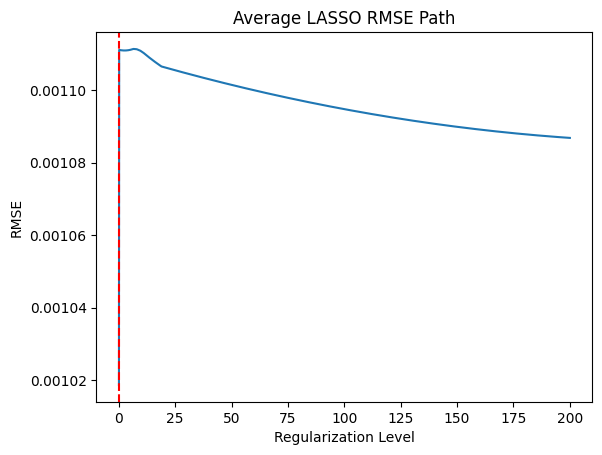

In [ ]:
plt.plot(alphas, rmses)
plt.axvline(x=optimal_alpha, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average LASSO RMSE Path')
ax.set_xlabel('Regularization Level')
ax.set_ylabel('RMSE')

Busy with fold 0
Busy with fold 1
Busy with fold 2
Busy with fold 3
Busy with fold 4
{'train': [0.0002704832649549204, 0.0002538150178876942, 0.0002440818809281087, 0.00023282486918033512, 0.0002625621976125364], 'test': [0.00024985882610170375, 0.00033501263317153927, 0.000509917255066776, 0.0004364097488685963, 0.00030594252840847986]}
0.000252753446112719
0.000367428198323419


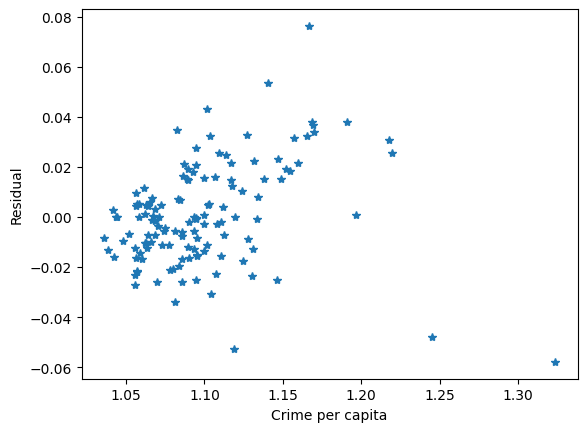

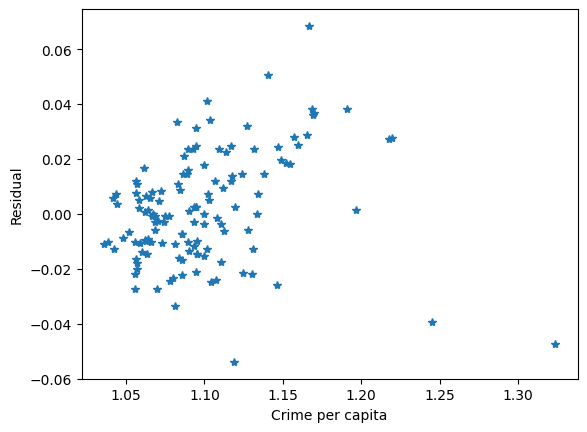

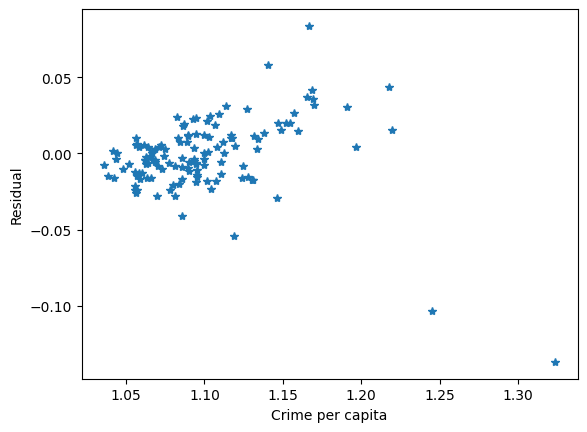

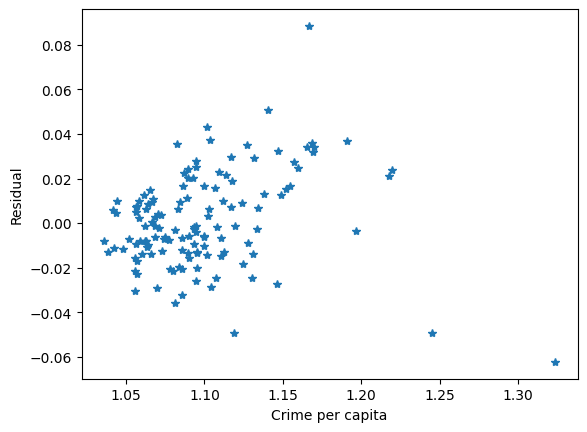

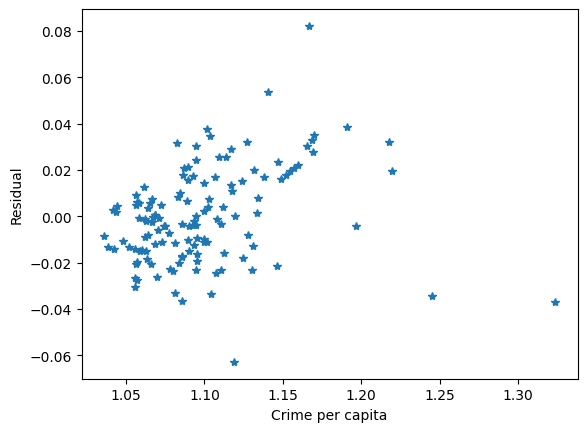

[0.00042197282117457593, 0.00040025467177364323, 0.0005907600655113817, 0.0004588343283787283, 0.0004296192483856405]
0.00046028822704479393


In [ ]:
## Cross-validation with SEPERATE test set outside
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

X = relative_gemeente_features.drop(columns=['crime_per_capita'])
Y = relative_gemeente_features['crime_per_capita']

X_public, X_private, y_public, y_private = train_test_split(X, Y, test_size=0.33, random_state=21)

k_folds = KFold(n_splits=5, shuffle=True, random_state=21)

errors = {'train': [], 'test': []}
models = []

#i is folder number
#x_index is a list with x indices (so train or test indices)
for i, (train_index, test_index) in enumerate(k_folds.split(X_public)):
    print('Busy with fold', i)

    # Get train data
    X_train = X_public.iloc[train_index]
    y_train = y_public.iloc[train_index]

    # Get test data
    X_test = X_public.iloc[test_index]
    y_test = y_public.iloc[test_index]

    model = LinearRegression()

    model.fit(X=X_train, y=y_train)
    y_pred_train = model.predict(X=X_train)
    mse_train = MSE(y_true=y_train, y_pred=y_pred_train)
    errors['train'].append(mse_train)

    y_pred_test = model.predict(X=X_test)
    mse_test = MSE(y_true=y_test, y_pred=y_pred_test)
    errors['test'].append(mse_test)

    models.append(model)

    #gm2_residuals = y_test - y_pred_test
    #plt.plot(y_test, gm2_residuals, '*')
    #plt.xlabel("Crime per capita")
    #plt.ylabel("Residual")
    #plt.show()

print(errors)
print(np.average(errors['train']))
print(np.average(errors['test']))

errors_private = []
for model in models:
    y_pred_private = model.predict(X_private)
    mse_private = MSE(y_true=y_private, y_pred=y_pred_private)
    errors_private.append(mse_private)

    gm2_residuals = y_private - y_pred_private
    plt.plot(y_private, gm2_residuals, '*')
    plt.xlabel("Crime per capita")
    plt.ylabel("Residual")
    plt.show()

print(errors_private)
print(np.average(errors_private))

## Ethics

Creating a regression model to predict crime rates based on demographic features such as average income, housing situation and minority populations raises ethical concerns. While such models may provide useful insights into the social and economic factors that contribute to crime, they can also reinforce harmful stereotypes and exacerbate existing biases.

One ethical issue is the potential for discrimination against minority groups. If a model suggests that certain ethnic or racial groups are more likely to commit crimes, this could lead to increased surveillance and policing of those groups. This could also perpetuate negative stereotypes and exacerbate existing inequalities.

Additionally, regression models are not perfect and are subject to bias and errors. The data used to train the model may not be representative of the entire population, leading to inaccurate or misleading results. This could result in flawed policy decisions or unfairly targeting certain communities.

To address these ethical concerns, it is important to ensure that the data used to train regression models is representative, unbiased, and appropriately anonymized. Models should also be transparent, so that policymakers and the public can understand how they work and what factors are driving their predictions. Finally, it is important to consider the potential impact of the model on specific communities, and to ensure that it is not reinforcing harmful stereotypes or exacerbating existing inequalities.





Ethical considerations
- Provide Datasheets for the Dataset (see portal)
- How did you get the data (legally...)?
- Did you check the source?
- Are there considerations about the analysis you
made?
- Did you have to make decisions that affect the
analysis?
- What are the limitations of your analysis and your
conclusions?
- Who are the stakeholders of your project?
- Who can benefit from this project, who can be
harmed, who is excluded, etc.